# 003 Data Preparation & Analysis With Python

* Written by Alexandre Gazagnes
* Last update: 2024-02-01

## About 

Context : 

You're an export project manager for a major food manufacturer. You are in charge of poultry departement.
You have been asked to identify segments of countries within the company's database in order to target them with personalized marketing campaigns.

Data  : 

After a quick look on the internet, you find a very interesting dataset on the FAO website. It contains a list of countries with various indicators. You decide to use this dataset to identify segments of countries.

You can download the "raw" dataset [here](https://www.fao.org/faostat/fr/#data/QCL).

**You can also use a preprocessed version of the dataset [here](https://gist.githubusercontent.com/AlexandreGazagnes/28a8da40ffa339b96b02f3e3cd79792d/raw/4849eba0d69f43472a7637e1b62e56fd7eb09c7e/chicken.csv).**

Mission :

Your objective is to

- Take a quick tour of the data to understand the data set 

- Clean up the dataset if necessary 

- Perform clustering with Kmeans and Agglomerative Clustering, focusing on countries with large potential markets: populous countries, wealthy countries and/or countries with high import levels

- You need to be able to understand and explain the clusters you've created.

## Preliminaries

### System

These commands will display the system information:

Uncomment theses lines if needed. 

In [1]:
# pwd

In [2]:
# cd ..

In [3]:
# ls

In [4]:
# cd ..

In [5]:
# ls

These commands will install the required packages:

In [6]:
# !pip install pandas matplotlib seaborn plotly scikit-learn

This command will download the dataset:

In [7]:
!wget https://gist.githubusercontent.com/AlexandreGazagnes/28a8da40ffa339b96b02f3e3cd79792d/raw/4849eba0d69f43472a7637e1b62e56fd7eb09c7e/chicken.csv

--2024-04-02 12:25:20--  https://gist.githubusercontent.com/AlexandreGazagnes/28a8da40ffa339b96b02f3e3cd79792d/raw/4849eba0d69f43472a7637e1b62e56fd7eb09c7e/chicken.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12107 (12K) [text/plain]
Saving to: ‘chicken.csv’

chicken.csv         100%[===================>]  11,82K  --.-KB/s    in 0,005s  

2024-04-02 12:25:20 (2,54 MB/s) - ‘chicken.csv’ saved [12107/12107]



### Import 

Import data libraries:

In [8]:
import pandas as pd
import numpy as np

Import Graphical libraries:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Import Machine Learning libraries:

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

### Get the data

1st option : Download the dataset from the web

In [11]:
url = "https://gist.githubusercontent.com/AlexandreGazagnes/28a8da40ffa339b96b02f3e3cd79792d/raw/4849eba0d69f43472a7637e1b62e56fd7eb09c7e/chicken.csv"
df = pd.read_csv(url)
df.head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,1,Arménie,47.0,35.0,5.44,54.0,0.0,0.0,-2.0,11.0,47.0,2944.791
1,2,Afghanistan,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296.113
2,3,Albanie,47.0,38.0,6.26,85.0,0.0,0.0,4.0,13.0,47.0,2884.169
3,4,Algérie,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389.189
4,7,Angola,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816.766


2nd Option : Read data from a file

In [12]:
# or

# fn = "./chicken.csv"
# df = pd.read_csv(fn)
# df.head()

3rd Option : Load a toy dataset

In [13]:
# or

# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df["Species"] = data.target
# df.head()

## Data Exploration

### Display

Display the first rows of the dataset:

In [14]:
# Head 

df.head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,1,Arménie,47.0,35.0,5.44,54.0,0.0,0.0,-2.0,11.0,47.0,2944.791
1,2,Afghanistan,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296.113
2,3,Albanie,47.0,38.0,6.26,85.0,0.0,0.0,4.0,13.0,47.0,2884.169
3,4,Algérie,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389.189
4,7,Angola,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816.766


Display the last rows of the dataset:

In [15]:
# Tail

df.tail()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
167,255,Belgique,152.0,338.0,4.57,44.0,656.0,-25.0,-6.0,463.0,144.0,11419.748
168,256,Luxembourg,11.0,11.0,7.19,69.0,1.0,0.0,0.0,0.0,11.0,591.910
169,272,Serbie,90.0,12.0,3.50,35.0,7.0,-0.0,0.0,85.0,90.0,8829.628
170,273,Monténégro,10.0,8.0,5.79,55.0,0.0,0.0,1.0,4.0,10.0,627.563
171,276,Soudan,69.0,2.0,0.54,5.0,0.0,0.0,0.0,67.0,65.0,40813.397


Display a sample of the dataset:

In [16]:
# Sample 

df.sample(10)

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
50,79,Allemagne,1739.0,842.0,7.96,71.0,646.0,-38.0,-29.0,1514.0,1609.0,82658.409
141,209,Eswatini,7.0,2.0,2.23,22.0,0.0,0.0,0.0,6.0,7.0,1124.805
56,89,Guatemala,357.0,129.0,6.11,71.0,7.0,-3.0,-0.0,235.0,348.0,16914.970
96,136,Mauritanie,22.0,24.0,1.59,11.0,0.0,0.0,6.0,5.0,22.0,4282.570
101,144,Mozambique,116.0,24.0,1.20,13.0,0.0,0.0,-1.0,92.0,103.0,28649.018
171,276,Soudan,69.0,2.0,0.54,5.0,0.0,0.0,0.0,67.0,65.0,40813.397
168,256,Luxembourg,11.0,11.0,7.19,69.0,1.0,0.0,0.0,0.0,11.0,591.910
40,60,El Salvador,131.0,16.0,6.25,71.0,2.0,0.0,20.0,136.0,131.0,6388.126
71,106,Italie,1173.0,97.0,7.83,65.0,183.0,0.0,56.0,1315.0,1146.0,60673.701
143,211,Suisse,133.0,51.0,6.49,55.0,4.0,0.0,5.0,91.0,133.0,8455.804


In [17]:
# Sample 20
df.sample(20)

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
161,236,Venezuela (République bolivarienne du),626.0,25.0,7.23,71.0,0.0,0.0,-1.0,600.0,596.0,29402.484
71,106,Italie,1173.0,97.0,7.83,65.0,183.0,0.0,56.0,1315.0,1146.0,60673.701
26,41,"Chine, continentale",18161.0,452.0,3.96,59.0,576.0,-1.0,-50.0,18236.0,17518.0,1421021.791
162,237,Viet Nam,1206.0,291.0,4.01,48.0,1.0,0.0,2.0,918.0,1166.0,94600.648
65,100,Inde,3661.0,0.0,0.75,7.0,4.0,0.0,-119.0,3545.0,2965.0,1338676.785
34,54,Danemark,167.0,133.0,12.97,112.0,139.0,0.0,0.0,173.0,166.0,5732.274
91,130,Malawi,98.0,0.0,1.74,17.0,0.0,0.0,33.0,130.0,91.0,17670.196
52,81,Ghana,211.0,151.0,2.26,16.0,0.0,0.0,0.0,60.0,211.0,29121.465
125,183,Roumanie,381.0,146.0,7.91,66.0,69.0,-0.0,88.0,392.0,381.0,19653.969
157,231,États-Unis d'Amérique,18266.0,123.0,19.93,219.0,3692.0,-0.0,80.0,21914.0,18100.0,325084.756


### Structure

What is the shape of the dataset?

In [18]:
# Structure

df.shape

(172, 12)

What data types are present in the dataset?

In [19]:
# Dtypes

df.dtypes

code_zone       int64
zone           object
dispo_int     float64
import        float64
dispo_prot    float64
dispo_alim    float64
export        float64
residus       float64
var_stock     float64
prod          float64
nourriture    float64
population    float64
dtype: object

Get all the columns names:

In [20]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   code_zone   172 non-null    int64  
 1   zone        172 non-null    object 
 2   dispo_int   172 non-null    float64
 3   import      172 non-null    float64
 4   dispo_prot  172 non-null    float64
 5   dispo_alim  172 non-null    float64
 6   export      172 non-null    float64
 7   residus     172 non-null    float64
 8   var_stock   172 non-null    float64
 9   prod        172 non-null    float64
 10  nourriture  172 non-null    float64
 11  population  172 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 16.2+ KB


Count the number of columns with specific data types:

In [21]:
# Value counts on dtypes

df.dtypes.value_counts()

float64    10
int64       1
object      1
Name: count, dtype: int64

Select only string columns:

In [22]:
# Select dtypes str

df.select_dtypes(include='object').head()

,zone
0,Arménie
1,Afghanistan
2,Albanie
3,Algérie
4,Angola


Select only numerical columns:

In [23]:
# Select dtypes float

df.select_dtypes(include="float").head()

,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,47.0,35.0,5.44,54.0,0.0,0.0,-2.0,11.0,47.0,2944.791
1,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296.113
2,47.0,38.0,6.26,85.0,0.0,0.0,4.0,13.0,47.0,2884.169
3,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389.189
4,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816.766


Count number of unique values : 

In [24]:
# Number unique values for int columns

df.select_dtypes(include=int).nunique()

code_zone    172
dtype: int64

In [25]:
# Number unique values for float columns

df.select_dtypes(include=float).nunique()

dispo_int     136
import         84
dispo_prot    164
dispo_alim    112
export         50
residus        15
var_stock      55
prod          125
nourriture    131
population    172
dtype: int64

In [26]:
# Number unique values for object columns

df.select_dtypes(include="object").nunique()

zone    172
dtype: int64

### NaN

How many NaN are present in the dataset?

In [27]:
# isna ?
df.isna().head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# Sum of isna

df.isna().sum()

code_zone     0
zone          0
dispo_int     0
import        0
dispo_prot    0
dispo_alim    0
export        0
residus       0
var_stock     0
prod          0
nourriture    0
population    0
dtype: int64

### Data Inspection

Have a look to a numercial summary of the dataset:

In [29]:
# Describe ? 
df.describe()

,code_zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02
mean,126.639535,679.598837,88.488372,7.121279,74.558140,103.750000,-2.703488,13.430233,708.325581,649.406977,4.284175e+04
std,72.976310,2175.612987,185.824620,5.603464,60.571277,458.066125,13.271761,74.722417,2474.456332,2125.189092,1.530637e+05
min,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,-125.000000,-119.000000,0.000000,0.000000,5.204500e+01
25%,66.750000,28.750000,3.000000,2.165000,22.000000,0.000000,0.000000,0.000000,11.000000,27.500000,2.874480e+03
50%,121.500000,98.000000,16.000000,6.505000,64.000000,0.000000,0.000000,0.000000,66.000000,94.500000,9.757833e+03
75%,188.250000,360.750000,79.750000,10.365000,105.500000,12.000000,0.000000,7.000000,368.750000,353.750000,3.013874e+04
max,276.000000,18266.000000,1069.000000,27.870000,243.000000,4223.000000,0.000000,859.000000,21914.000000,18100.000000,1.421022e+06


In [30]:
# Better ?
df.describe().round(2)

,code_zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,126.64,679.60,88.49,7.12,74.56,103.75,-2.70,13.43,708.33,649.41,42841.75
std,72.98,2175.61,185.82,5.60,60.57,458.07,13.27,74.72,2474.46,2125.19,153063.71
min,1.00,0.00,0.00,0.04,0.00,0.00,-125.00,-119.00,0.00,0.00,52.04
25%,66.75,28.75,3.00,2.16,22.00,0.00,0.00,0.00,11.00,27.50,2874.48
50%,121.50,98.00,16.00,6.50,64.00,0.00,0.00,0.00,66.00,94.50,9757.83
75%,188.25,360.75,79.75,10.36,105.50,12.00,0.00,7.00,368.75,353.75,30138.74
max,276.00,18266.00,1069.00,27.87,243.00,4223.00,0.00,859.00,21914.00,18100.00,1421021.79


Compute the correlation matrix:

In [31]:
# creating tmp variable

corr = df.select_dtypes(include="number").corr()
corr.round(4)

,code_zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
code_zone,1.0000,-0.0187,0.0356,-0.0732,-0.1336,0.0177,-0.0573,-0.0171,-0.0163,-0.0182,-0.0578
dispo_int,-0.0187,1.0000,0.2637,0.1775,0.2110,0.6857,0.0001,0.0561,0.9881,0.9987,0.6759
import,0.0356,0.2637,1.0000,0.2191,0.1750,0.1606,-0.4098,0.3032,0.1956,0.2630,0.1516
dispo_prot,-0.0732,0.1775,0.2191,1.0000,0.9726,0.2465,-0.1766,0.0672,0.1873,0.1825,-0.0940
dispo_alim,-0.1336,0.2110,0.1750,0.9726,1.0000,0.2654,-0.1226,0.0578,0.2232,0.2164,-0.0707
export,0.0177,0.6857,0.1606,0.2465,0.2654,1.0000,-0.2812,0.0567,0.7777,0.6980,0.2089
residus,-0.0573,0.0001,-0.4098,-0.1766,-0.1226,-0.2812,1.0000,-0.0042,-0.0213,-0.0037,0.0152
var_stock,-0.0171,0.0561,0.3032,0.0672,0.0578,0.0567,-0.0042,1.0000,0.0673,0.0596,-0.0826
prod,-0.0163,0.9881,0.1956,0.1873,0.2232,0.7777,-0.0213,0.0673,1.0000,0.9894,0.6190
nourriture,-0.0182,0.9987,0.2630,0.1825,0.2164,0.6980,-0.0037,0.0596,0.9894,1.0000,0.6569


Try a first visualization of the correlation matrix:

<Axes: >

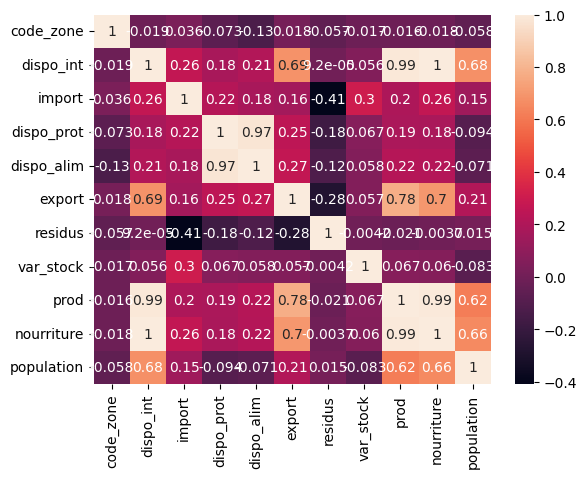

In [32]:
# Building heatmap 

sns.heatmap(corr, annot=True)

<Axes: >

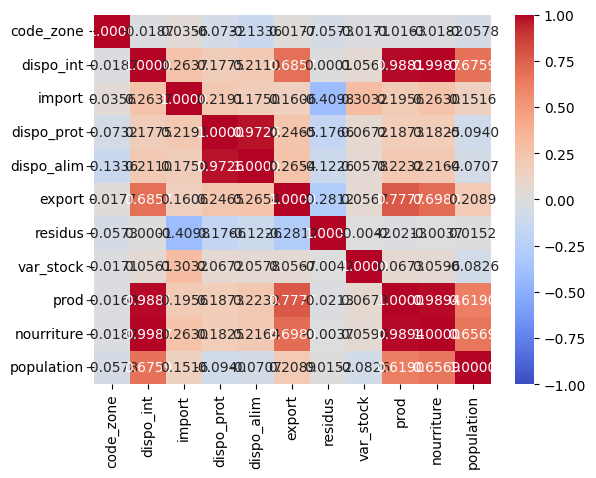

In [33]:
# Better heatmap ?
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.4f', vmin=-1, vmax=1)

Find the best visualization for the correlation matrix:

<Axes: >

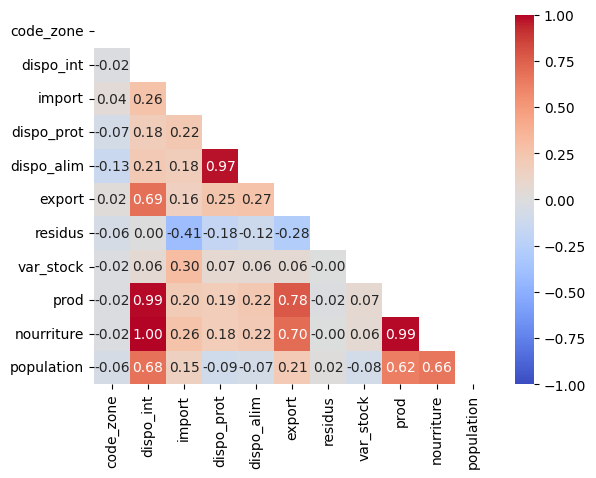

In [34]:
# Best heatmap ?
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, mask=mask)

Write a function to display the correlation matrix:

In [35]:
# With a function

def make_corr_heatmap(df):
    corr = df.select_dtypes(include="number").corr()
    mask = np.triu(corr)
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, mask=mask)

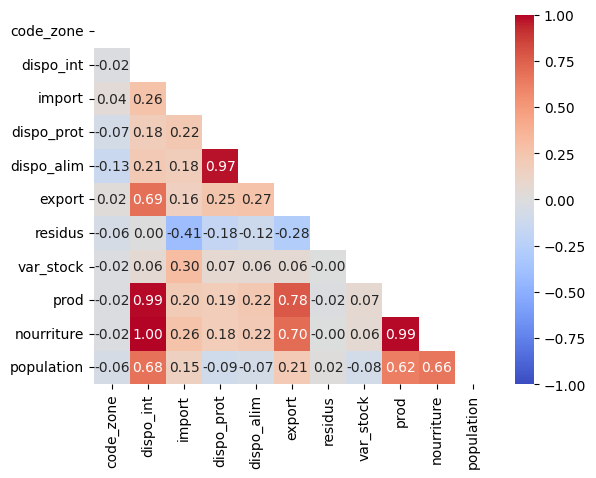

In [36]:
make_corr_heatmap(df)

### Visualization

Use Boxplot to visualize the distribution of the numerical columns:

<Axes: ylabel='population'>

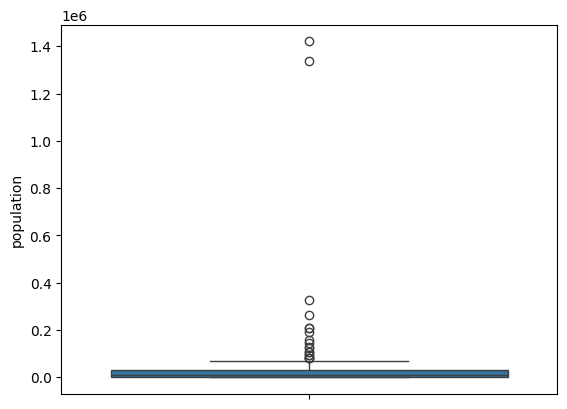

In [37]:
# Box plot 1
sns.boxplot(data=df.population)

Try to apply log transformation to the numerical columns:

<Axes: ylabel='population'>

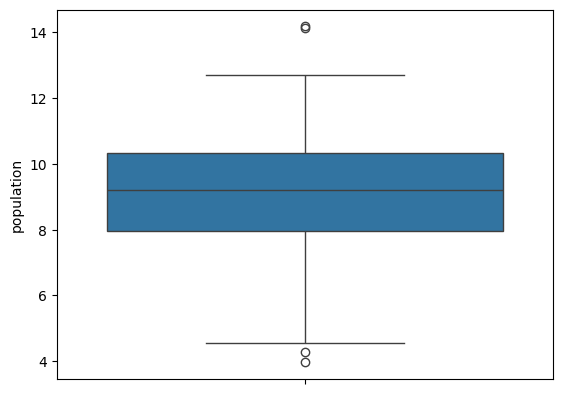

In [38]:
tmp = np.log1p(df.population)
sns.boxplot(data=tmp)

Plot all numerical columns:

<Axes: >

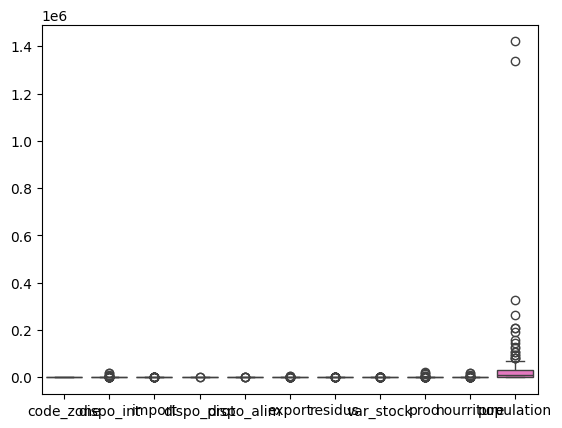

In [39]:
sns.boxplot(data=df.select_dtypes(include="number"))

Plot each numerical column:

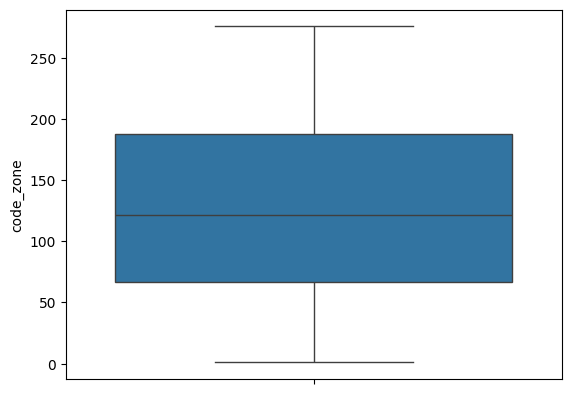

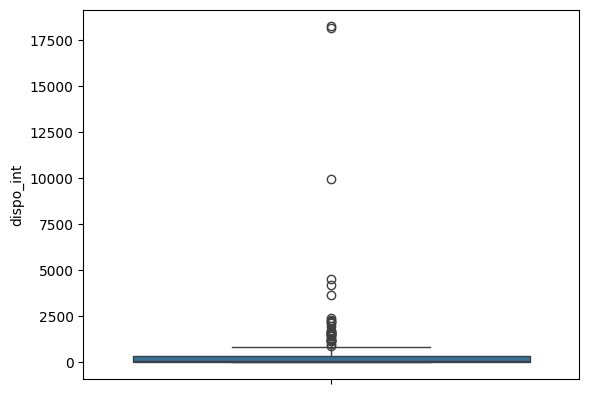

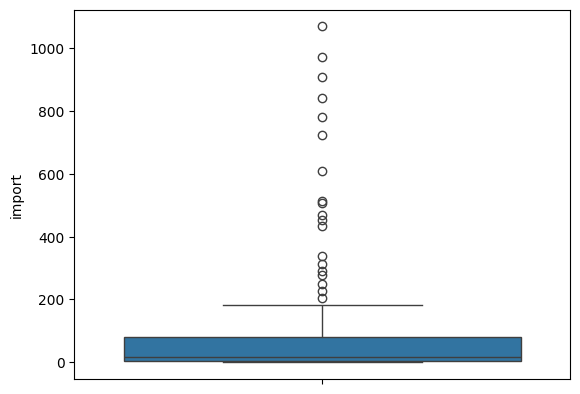

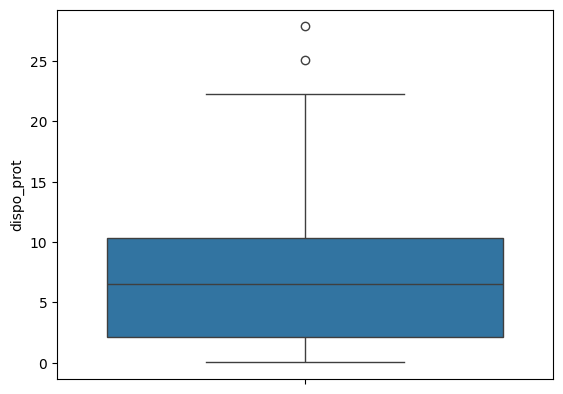

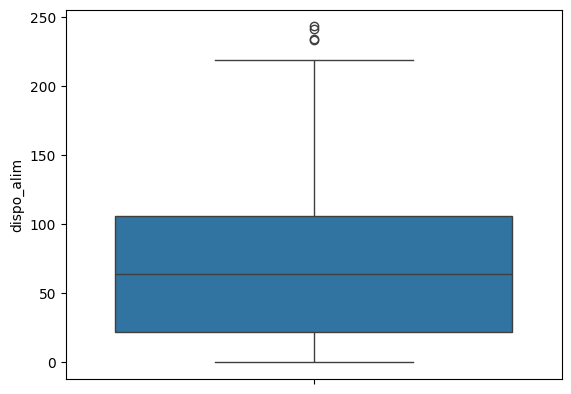

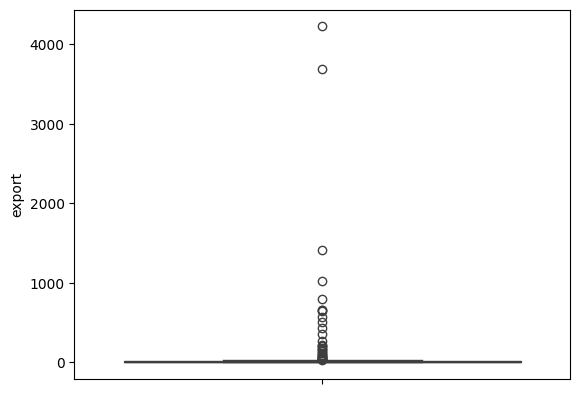

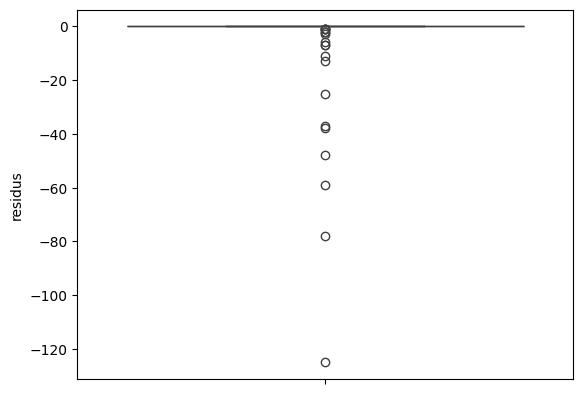

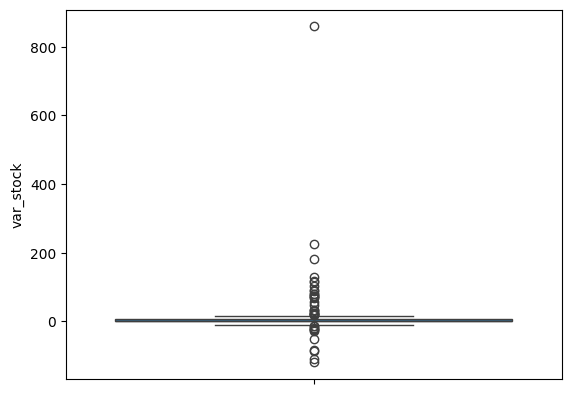

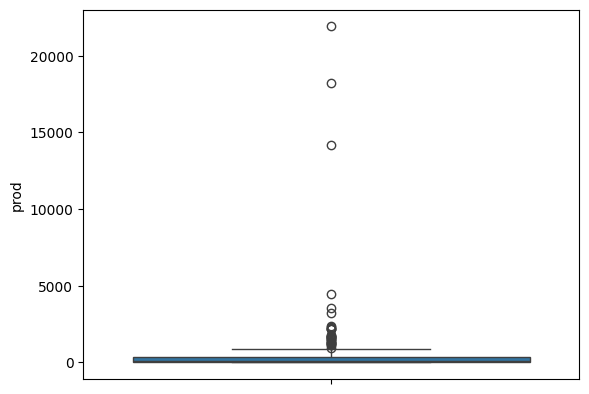

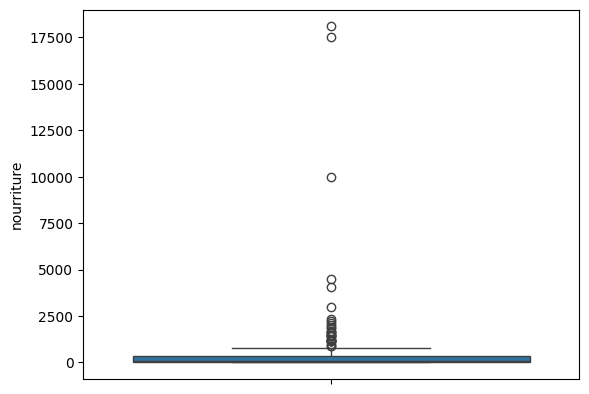

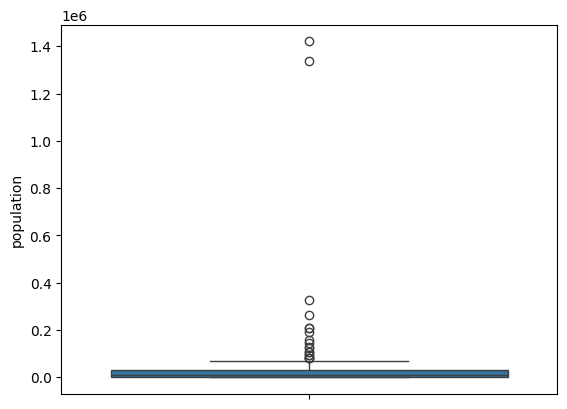

In [40]:
for col in df.select_dtypes(include="number").columns:
    plt.figure()
    sns.boxplot(data=df[col])

Make a pairplot of the numerical columns:

This visualization can be slow with large datasets. 
Use VIZ = True / False to enable / disable the visualization.

In [41]:
VIZ = False # Enable this with True
if VIZ : 
    sns.pairplot(df.select_dtypes(exclude="object"), corner=True)

## Data Cleaning

### Population

Have a look to small countries

In [42]:
df.population.describe().round(0)

count        172.0
mean       42842.0
std       153064.0
min           52.0
25%         2874.0
50%         9758.0
75%        30139.0
max      1421022.0
Name: population, dtype: float64

Update the population with the good number

In [43]:
df.population = df.population.astype(int) * 1_000
df.population.describe().round(0)

count    1.720000e+02
mean     4.284126e+07
std      1.530637e+08
min      5.200000e+04
25%      2.874250e+06
50%      9.757000e+06
75%      3.013800e+07
max      1.421021e+09
Name: population, dtype: float64

Sort the dataset by population

In [44]:
df.sort_values("population", ascending=False).head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
26,41,"Chine, continentale",18161.0,452.0,3.96,59.0,576.0,-1.0,-50.0,18236.0,17518.0,1421021000
65,100,Inde,3661.0,0.0,0.75,7.0,4.0,0.0,-119.0,3545.0,2965.0,1338676000
157,231,États-Unis d'Amérique,18266.0,123.0,19.93,219.0,3692.0,-0.0,80.0,21914.0,18100.0,325084000
66,101,Indonésie,2323.0,1.0,2.42,25.0,0.0,0.0,-21.0,2301.0,1904.0,264650000
114,165,Pakistan,1282.0,2.0,1.97,20.0,4.0,-0.0,-3.0,1281.0,1218.0,207906000


In [45]:
df.sort_values("population", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
128,188,Saint-Kitts-et-Nevis,4.0,4.0,19.22,190.0,0.0,0.0,0.0,0.0,3.0,52000
35,55,Dominique,4.0,4.0,11.52,150.0,0.0,0.0,0.0,0.0,3.0,71000
5,8,Antigua-et-Barbuda,7.0,7.0,17.77,233.0,0.0,0.0,0.0,0.0,5.0,95000
130,191,Saint-Vincent-et-les Grenadines,8.0,9.0,25.10,243.0,0.0,0.0,1.0,0.0,8.0,109000
55,86,Grenade,8.0,7.0,15.50,192.0,0.0,-0.0,-0.0,1.0,5.0,110000


Remember the shape of the dataset

In [46]:
df.shape

(172, 12)

Select only "large" countries +1M : 

In [47]:
df = df.loc[df.population > 1_000_000]
df

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,1,Arménie,47.0,35.0,5.44,54.0,0.0,0.0,-2.0,11.0,47.0,2944000
1,2,Afghanistan,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296000
2,3,Albanie,47.0,38.0,6.26,85.0,0.0,0.0,4.0,13.0,47.0,2884000
3,4,Algérie,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389000
4,7,Angola,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816000
...,...,...,...,...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,3.04,30.0,0.0,0.0,-0.0,168.0,237.0,27834000
166,251,Zambie,60.0,12.0,1.15,11.0,1.0,0.0,-0.0,49.0,58.0,16853000
167,255,Belgique,152.0,338.0,4.57,44.0,656.0,-25.0,-6.0,463.0,144.0,11419000
169,272,Serbie,90.0,12.0,3.50,35.0,7.0,-0.0,0.0,85.0,90.0,8829000


In [48]:
df.sort_values("population", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
141,209,Eswatini,7.0,2.0,2.23,22.0,0.0,0.0,0.0,6.0,7.0,1124000
31,50,Chypre,38.0,14.0,9.58,91.0,1.0,-0.0,0.0,25.0,30.0,1179000
123,176,Timor-Leste,5.0,11.0,1.46,14.0,0.0,0.0,7.0,1.0,5.0,1243000
97,137,Maurice,49.0,2.0,13.06,128.0,0.0,-0.0,0.0,48.0,48.0,1264000
41,63,Estonie,29.0,21.0,7.27,86.0,11.0,0.0,2.0,20.0,28.0,1319000


Select only "large" countries +5M : 

In [49]:
df = df.loc[df.population > 5_000_000]
df

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
1,2,Afghanistan,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296000
3,4,Algérie,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389000
4,7,Angola,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816000
6,9,Argentine,1962.0,8.0,13.53,182.0,207.0,0.0,0.0,2161.0,1856.0,43937000
7,10,Australie,1171.0,16.0,16.60,192.0,42.0,-0.0,71.0,1269.0,1171.0,24584000
...,...,...,...,...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,3.04,30.0,0.0,0.0,-0.0,168.0,237.0,27834000
166,251,Zambie,60.0,12.0,1.15,11.0,1.0,0.0,-0.0,49.0,58.0,16853000
167,255,Belgique,152.0,338.0,4.57,44.0,656.0,-25.0,-6.0,463.0,144.0,11419000
169,272,Serbie,90.0,12.0,3.50,35.0,7.0,-0.0,0.0,85.0,90.0,8829000


In [50]:
df.sort_values("population", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
28,46,Congo,110.0,104.0,7.45,72.0,0.0,0.0,-0.0,7.0,110.0,5110000
113,162,Norvège,102.0,2.0,7.81,66.0,0.0,0.0,1.0,101.0,101.0,5296000
136,199,Slovaquie,74.0,63.0,4.74,48.0,35.0,-7.0,26.0,71.0,76.0,5447000
43,67,Finlande,111.0,16.0,7.87,68.0,12.0,-0.0,22.0,129.0,103.0,5511000
34,54,Danemark,167.0,133.0,12.97,112.0,139.0,0.0,0.0,173.0,166.0,5732000


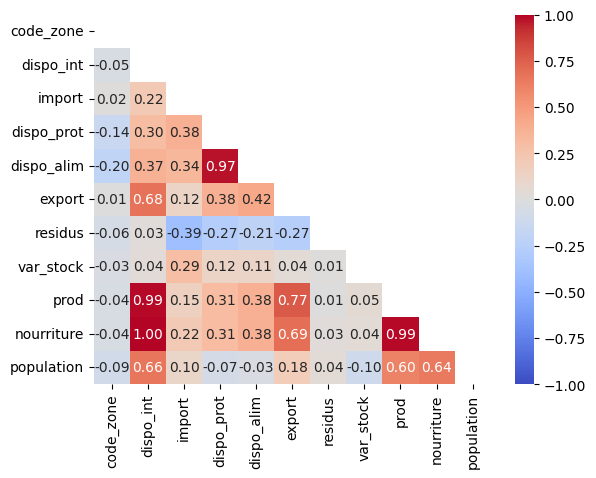

In [51]:
make_corr_heatmap(df)

### Columns

Select only relevant columns:

In [52]:
cols = [
    "code_zone",
    "zone",
    "dispo_int", # WHY NOT
    "import",
    # "dispo_prot",
    "dispo_alim",
    "export",
    # "residus",
    # "var_stock",
    # "prod",
    # "nourriture",
    "population",
]

df  = df.loc[:, cols]
df

,code_zone,zone,dispo_int,import,dispo_alim,export,population
1,2,Afghanistan,57.0,29.0,5.0,0.0,36296000
3,4,Algérie,277.0,2.0,22.0,0.0,41389000
4,7,Angola,319.0,277.0,35.0,0.0,29816000
6,9,Argentine,1962.0,8.0,182.0,207.0,43937000
7,10,Australie,1171.0,16.0,192.0,42.0,24584000
...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,30.0,0.0,27834000
166,251,Zambie,60.0,12.0,11.0,1.0,16853000
167,255,Belgique,152.0,338.0,44.0,656.0,11419000
169,272,Serbie,90.0,12.0,35.0,7.0,8829000


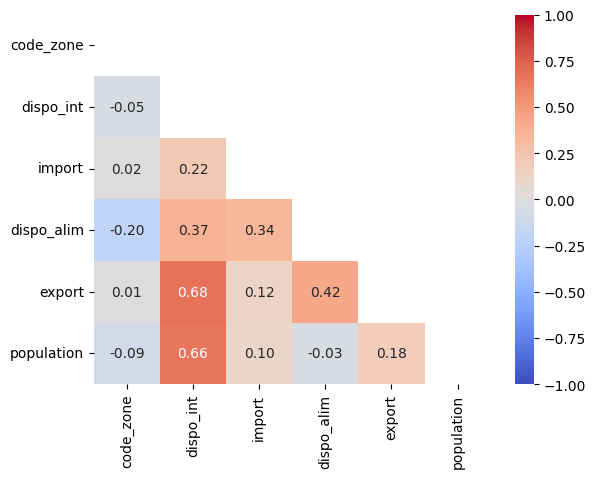

In [53]:
make_corr_heatmap(df)

## Feature engineering

Have a look to our dataset:

In [54]:
df

,code_zone,zone,dispo_int,import,dispo_alim,export,population
1,2,Afghanistan,57.0,29.0,5.0,0.0,36296000
3,4,Algérie,277.0,2.0,22.0,0.0,41389000
4,7,Angola,319.0,277.0,35.0,0.0,29816000
6,9,Argentine,1962.0,8.0,182.0,207.0,43937000
7,10,Australie,1171.0,16.0,192.0,42.0,24584000
...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,30.0,0.0,27834000
166,251,Zambie,60.0,12.0,11.0,1.0,16853000
167,255,Belgique,152.0,338.0,44.0,656.0,11419000
169,272,Serbie,90.0,12.0,35.0,7.0,8829000


### Depedency

Create a new column with some kind of "depedency" :

In [55]:
df["dependence"] = df["import"] / df["dispo_int"]
df

,code_zone,zone,dispo_int,import,dispo_alim,export,population,dependence
1,2,Afghanistan,57.0,29.0,5.0,0.0,36296000,0.508772
3,4,Algérie,277.0,2.0,22.0,0.0,41389000,0.007220
4,7,Angola,319.0,277.0,35.0,0.0,29816000,0.868339
6,9,Argentine,1962.0,8.0,182.0,207.0,43937000,0.004077
7,10,Australie,1171.0,16.0,192.0,42.0,24584000,0.013664
...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,30.0,0.0,27834000,0.317073
166,251,Zambie,60.0,12.0,11.0,1.0,16853000,0.200000
167,255,Belgique,152.0,338.0,44.0,656.0,11419000,2.223684
169,272,Serbie,90.0,12.0,35.0,7.0,8829000,0.133333


In [56]:
df.sort_values("dispo_alim", ascending=False).head()

,code_zone,zone,dispo_int,import,dispo_alim,export,population,dependence
70,105,Israël,636.0,0.0,234.0,3.0,8243000,0.000000
157,231,États-Unis d'Amérique,18266.0,123.0,219.0,3692.0,325084000,0.006734
61,96,Chine - RAS de Hong-Kong,280.0,907.0,210.0,663.0,7306000,3.239286
14,21,Brésil,9982.0,3.0,204.0,4223.0,207833000,0.000301
7,10,Australie,1171.0,16.0,192.0,42.0,24584000,0.013664


In [57]:
df.sort_values("dispo_int", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_alim,export,population,dependence
160,235,Ouzbékistan,0.0,0.0,6.0,0.0,31959000,NaN
84,120,République démocratique populaire lao,0.0,0.0,41.0,0.0,6953000,NaN
24,39,Tchad,7.0,1.0,2.0,0.0,15016000,0.142857
163,238,Éthiopie,14.0,1.0,0.0,0.0,106399000,0.071429
126,184,Rwanda,19.0,0.0,5.0,0.0,11980000,0.000000


Drop columns with infini values:

In [58]:
df = df.loc[df.dispo_int > 0]
df.sort_values("dispo_int", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_alim,export,population,dependence
24,39,Tchad,7.0,1.0,2.0,0.0,15016000,0.142857
163,238,Éthiopie,14.0,1.0,0.0,0.0,106399000,0.071429
126,184,Rwanda,19.0,0.0,5.0,0.0,11980000,0.000000
111,158,Niger,21.0,3.0,3.0,0.0,21602000,0.142857
144,213,Turkménistan,27.0,9.0,15.0,0.0,5757000,0.333333


Drop useless columns if needed : 

In [59]:
df.drop(columns=["code_zone", "depedance"], inplace=True, errors="ignore")
df

/tmp/ipykernel_255753/2924086110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["code_zone", "depedance"], inplace=True, errors="ignore")


,zone,dispo_int,import,dispo_alim,export,population,dependence
1,Afghanistan,57.0,29.0,5.0,0.0,36296000,0.508772
3,Algérie,277.0,2.0,22.0,0.0,41389000,0.007220
4,Angola,319.0,277.0,35.0,0.0,29816000,0.868339
6,Argentine,1962.0,8.0,182.0,207.0,43937000,0.004077
7,Australie,1171.0,16.0,192.0,42.0,24584000,0.013664
...,...,...,...,...,...,...,...
165,Yémen,246.0,78.0,30.0,0.0,27834000,0.317073
166,Zambie,60.0,12.0,11.0,1.0,16853000,0.200000
167,Belgique,152.0,338.0,44.0,656.0,11419000,2.223684
169,Serbie,90.0,12.0,35.0,7.0,8829000,0.133333


### Delta

Compute diffrence between columns Import and Export : 

In [60]:
df["delta"] = df["import"] - df["export"]
df

/tmp/ipykernel_255753/3927088252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta"] = df["import"] - df["export"]


,zone,dispo_int,import,dispo_alim,export,population,dependence,delta
1,Afghanistan,57.0,29.0,5.0,0.0,36296000,0.508772,29.0
3,Algérie,277.0,2.0,22.0,0.0,41389000,0.007220,2.0
4,Angola,319.0,277.0,35.0,0.0,29816000,0.868339,277.0
6,Argentine,1962.0,8.0,182.0,207.0,43937000,0.004077,-199.0
7,Australie,1171.0,16.0,192.0,42.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...,...,...
165,Yémen,246.0,78.0,30.0,0.0,27834000,0.317073,78.0
166,Zambie,60.0,12.0,11.0,1.0,16853000,0.200000,11.0
167,Belgique,152.0,338.0,44.0,656.0,11419000,2.223684,-318.0
169,Serbie,90.0,12.0,35.0,7.0,8829000,0.133333,5.0


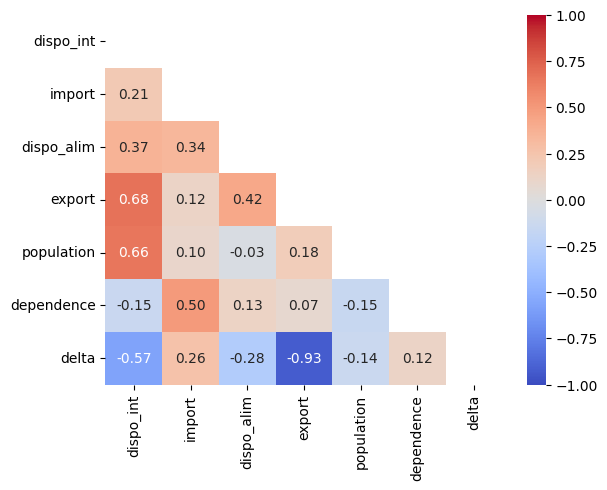

In [61]:
make_corr_heatmap(df)

Export is no more needed :

In [62]:
df.drop(columns="export", inplace=True, errors="ignore")

/tmp/ipykernel_255753/152559177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="export", inplace=True, errors="ignore")


In [63]:
df

,zone,dispo_int,import,dispo_alim,population,dependence,delta
1,Afghanistan,57.0,29.0,5.0,36296000,0.508772,29.0
3,Algérie,277.0,2.0,22.0,41389000,0.007220,2.0
4,Angola,319.0,277.0,35.0,29816000,0.868339,277.0
6,Argentine,1962.0,8.0,182.0,43937000,0.004077,-199.0
7,Australie,1171.0,16.0,192.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...,...
165,Yémen,246.0,78.0,30.0,27834000,0.317073,78.0
166,Zambie,60.0,12.0,11.0,16853000,0.200000,11.0
167,Belgique,152.0,338.0,44.0,11419000,2.223684,-318.0
169,Serbie,90.0,12.0,35.0,8829000,0.133333,5.0


### Scale

In [65]:
df

,zone,dispo_int,import,dispo_alim,population,dependence,delta
1,Afghanistan,57.0,29.0,5.0,36296000,0.508772,29.0
3,Algérie,277.0,2.0,22.0,41389000,0.007220,2.0
4,Angola,319.0,277.0,35.0,29816000,0.868339,277.0
6,Argentine,1962.0,8.0,182.0,43937000,0.004077,-199.0
7,Australie,1171.0,16.0,192.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...,...
165,Yémen,246.0,78.0,30.0,27834000,0.317073,78.0
166,Zambie,60.0,12.0,11.0,16853000,0.200000,11.0
167,Belgique,152.0,338.0,44.0,11419000,2.223684,-318.0
169,Serbie,90.0,12.0,35.0,8829000,0.133333,5.0


Select only numerical columns:

In [67]:
X  = df.select_dtypes(include="number")
X

,dispo_int,import,dispo_alim,population,dependence,delta
1,57.0,29.0,5.0,36296000,0.508772,29.0
3,277.0,2.0,22.0,41389000,0.007220,2.0
4,319.0,277.0,35.0,29816000,0.868339,277.0
6,1962.0,8.0,182.0,43937000,0.004077,-199.0
7,1171.0,16.0,192.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...
165,246.0,78.0,30.0,27834000,0.317073,78.0
166,60.0,12.0,11.0,16853000,0.200000,11.0
167,152.0,338.0,44.0,11419000,2.223684,-318.0
169,90.0,12.0,35.0,8829000,0.133333,5.0


Use SciKit Learn to scale the dataset:

In [68]:
scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-3.74105331e-01, -4.44496163e-01, -1.09533999e+00,
        -1.59395036e-01,  4.66401926e-01,  1.06225317e-01],
       [-2.91244176e-01, -5.65846090e-01, -7.83850578e-01,
        -1.32269415e-01, -6.22814294e-01,  5.98698737e-02],
       [-2.75425228e-01,  6.70125384e-01, -5.45652793e-01,
        -1.93907902e-01,  1.24727017e+00,  5.32008643e-01],
       [ 3.43396946e-01, -5.38879439e-01,  2.14781446e+00,
        -1.18698615e-01, -6.29639369e-01, -2.85220645e-01],
       [ 4.54734280e-02, -5.02923906e-01,  2.33104353e+00,
        -2.21773846e-01, -6.08821385e-01,  1.17975626e-02],
       [-3.30414904e-01, -8.04463835e-02,  4.03440143e-03,
        -3.05739175e-01,  7.42350716e-01,  1.11375921e-01],
       [-3.01413499e-01, -5.74834973e-01, -1.05869417e+00,
         4.97782125e-01, -6.38494386e-01,  5.64361372e-02],
       [-2.33994650e-01, -5.70340532e-01,  1.65309599e+00,
        -2.93100435e-01, -6.33432165e-01,  5.64361372e-02],
       [ 3.36406270e+00, -5.61351648e-01,  2.550

Rebuild a DataFrame with the scaled data:

In [69]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,dispo_int,import,dispo_alim,population,dependence,delta
0,-0.374105,-0.444496,-1.095340,-0.159395,0.466402,0.106225
1,-0.291244,-0.565846,-0.783851,-0.132269,-0.622814,0.059870
2,-0.275425,0.670125,-0.545653,-0.193908,1.247270,0.532009
3,0.343397,-0.538879,2.147814,-0.118699,-0.629639,-0.285221
4,0.045473,-0.502924,2.331044,-0.221774,-0.608821,0.011798


Check that data were scaled:

In [70]:
X_scaled.describe().round(2)

,dispo_int,import,dispo_alim,population,dependence,delta
count,109.00,109.00,109.00,109.00,109.00,109.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.39,-0.57,-1.19,-0.33,-0.64,-7.19
25%,-0.36,-0.57,-0.89,-0.30,-0.62,0.06
50%,-0.30,-0.45,-0.11,-0.24,-0.35,0.07
75%,0.05,0.00,0.55,-0.09,0.19,0.16
max,6.48,4.23,3.10,7.22,6.40,1.87


Of course you can compute the scaling manually:

In [71]:
X_scaled = (X - X.mean()) / X.std()
X_scaled.head()

,dispo_int,import,dispo_alim,population,dependence,delta
1,-0.372385,-0.442452,-1.090304,-0.158662,0.464258,0.105737
3,-0.289905,-0.563244,-0.780247,-0.131661,-0.619951,0.059595
4,-0.274159,0.667044,-0.543144,-0.193016,1.241536,0.529563
6,0.341818,-0.536402,2.137939,-0.118153,-0.626744,-0.283909
7,0.045264,-0.500612,2.320326,-0.220754,-0.606022,0.011743


In [72]:
X_scaled.describe().round(2)

,dispo_int,import,dispo_alim,population,dependence,delta
count,109.00,109.00,109.00,109.00,109.00,109.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.39,-0.57,-1.18,-0.32,-0.64,-7.16
25%,-0.36,-0.56,-0.89,-0.30,-0.62,0.06
50%,-0.30,-0.45,-0.11,-0.24,-0.35,0.07
75%,0.05,0.00,0.55,-0.09,0.19,0.16
max,6.45,4.21,3.09,7.18,6.37,1.87


## Principal Component Analysis

### Initialisation and fit

Initialize a PCA : 

In [73]:
pca = PCA(n_components=6)
pca

PCA(n_components=6)

Fit : 

In [74]:
pca.fit(X_scaled)

PCA(n_components=6)

Here is our new dataset : 

In [75]:
X_proj = pca.transform(X_scaled)
X_proj

array([[-8.38059570e-01, -3.79236639e-01,  3.40350586e-01,
         8.86226639e-01, -7.01938026e-02, -1.50861102e-01],
       [-5.39492877e-01, -1.01151589e+00,  2.14039761e-01,
         2.61274621e-02, -2.33564507e-01,  5.85799081e-03],
       [-7.60936291e-01,  1.13003448e+00,  4.76507162e-01,
         7.43094079e-01, -1.15167183e-01, -1.60330225e-01],
       [ 1.03787913e+00, -2.20047475e-02, -1.37244203e+00,
        -1.29144068e+00,  9.08539452e-01, -9.04832456e-02],
       [ 7.22058956e-01,  1.49801497e-01, -1.41362528e+00,
        -1.53059986e+00,  1.08014260e+00, -3.34195487e-02],
       [-4.96144684e-01,  4.35721612e-01, -2.40202810e-01,
         4.40873987e-01,  2.59248945e-01, -1.01237615e-01],
       [-3.48452691e-01, -1.17664014e+00,  7.55639170e-01,
         2.04759347e-01, -7.26873500e-02,  2.37641866e-01],
       [ 2.51524508e-01, -1.39550631e-01, -1.13629955e+00,
        -1.22443821e+00,  8.32908067e-01,  5.60450292e-02],
       [ 6.74334973e+00, -1.44480959e+00, -4.078

Use pandas to create a DataFrame : 

In [76]:
X_proj = pd.DataFrame(
    X_proj, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)]
)
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.838060,-0.379237,0.340351,0.886227,-0.070194,-0.150861
1,-0.539493,-1.011516,0.214040,0.026127,-0.233565,0.005858
2,-0.760936,1.130034,0.476507,0.743094,-0.115167,-0.160330
3,1.037879,-0.022005,-1.372442,-1.291441,0.908539,-0.090483
4,0.722059,0.149801,-1.413625,-1.530600,1.080143,-0.033420
...,...,...,...,...,...,...
104,-0.626100,-0.293444,0.199525,0.286317,-0.132372,-0.074345
105,-0.768744,-0.790170,0.220000,0.389484,-0.252841,-0.069706
106,-0.608304,2.914070,-0.274849,3.108112,0.492205,-0.151508
107,-0.611528,-0.718563,-0.029374,0.068863,-0.117267,-0.034974


### Analyse the components

In [77]:
pcs = pca.components_
pcs

array([[ 0.65746828,  0.11200096,  0.34007587,  0.45991849, -0.10935016,
        -0.4648195 ],
       [ 0.0116111 ,  0.676086  ,  0.35800367, -0.08116444,  0.59973392,
         0.21985866],
       [ 0.11734793,  0.23466   , -0.51595151,  0.64512936, -0.05330446,
         0.49590819],
       [ 0.02268406, -0.18167368, -0.50909925,  0.07516001,  0.69165396,
        -0.47250803],
       [-0.23532271, -0.57193156,  0.47643177,  0.46208674,  0.3333298 ,
         0.25670484],
       [-0.70564776,  0.33939233,  0.0616971 ,  0.38278224, -0.18980633,
        -0.44779333]])

In [78]:
components = pd.DataFrame(pcs, columns=X.columns, index=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
components

,dispo_int,import,dispo_alim,population,dependence,delta
PC1,0.657468,0.112001,0.340076,0.459918,-0.109350,-0.464820
PC2,0.011611,0.676086,0.358004,-0.081164,0.599734,0.219859
PC3,0.117348,0.234660,-0.515952,0.645129,-0.053304,0.495908
PC4,0.022684,-0.181674,-0.509099,0.075160,0.691654,-0.472508
PC5,-0.235323,-0.571932,0.476432,0.462087,0.333330,0.256705
PC6,-0.705648,0.339392,0.061697,0.382782,-0.189806,-0.447793


Recompute the first value : 

In [79]:
value  = X_proj.iloc[0, 0]
value

-0.8380595702866858

In [80]:
X_scaled.head(1)

,dispo_int,import,dispo_alim,population,dependence,delta
1,-0.372385,-0.442452,-1.090304,-0.158662,0.464258,0.105737


In [81]:
(-0.37 * 0.66) + (-0.44 * 0.11) + (-1.1 * 0.34) + (-0.15 * 0.46) + (-0.46 * -0.1) + (0.11*-0.46)

-0.7402

In [82]:
sum([i * j for i, j in zip(pcs[0], X_scaled.iloc[0])])

-0.8380595702866859

In [83]:
components = components.T
components

,PC1,PC2,PC3,PC4,PC5,PC6
dispo_int,0.657468,0.011611,0.117348,0.022684,-0.235323,-0.705648
import,0.112001,0.676086,0.234660,-0.181674,-0.571932,0.339392
dispo_alim,0.340076,0.358004,-0.515952,-0.509099,0.476432,0.061697
population,0.459918,-0.081164,0.645129,0.075160,0.462087,0.382782
dependence,-0.109350,0.599734,-0.053304,0.691654,0.333330,-0.189806
delta,-0.464820,0.219859,0.495908,-0.472508,0.256705,-0.447793


<Axes: >

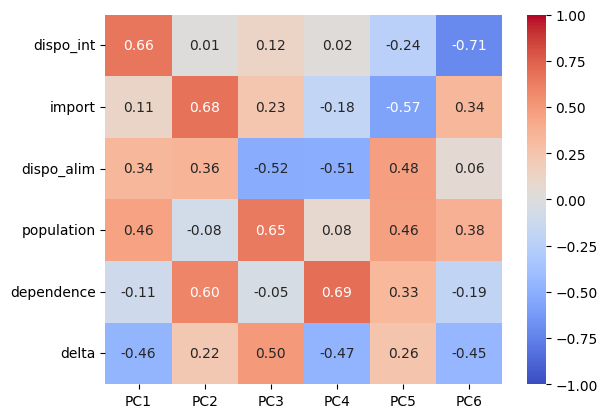

In [84]:
sns.heatmap(components, cmap="coolwarm", vmax=1, vmin=-1, annot=True, fmt=".2f")

### Plot explained variance

The explained variance ratio is pre-computed : 

In [85]:
pca.explained_variance_ratio_

array([0.35315778, 0.28280773, 0.18186013, 0.11229817, 0.05284052,
       0.01703566])

We can plot it : 

<Axes: xlabel='None'>

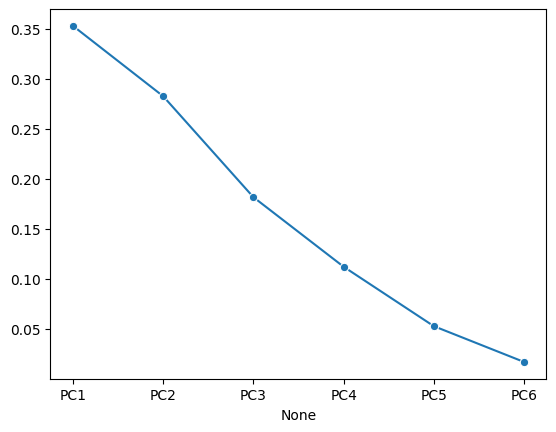

In [86]:
sns.lineplot(y=pca.explained_variance_ratio_, x=components.columns, marker="o")

A better feature is the cumulative variance : 

In [87]:
cum_var = pca.explained_variance_ratio_.cumsum()
cum_var

array([0.35315778, 0.63596551, 0.81782564, 0.93012381, 0.98296434,
       1.        ])

We can plot it : 

<Axes: >

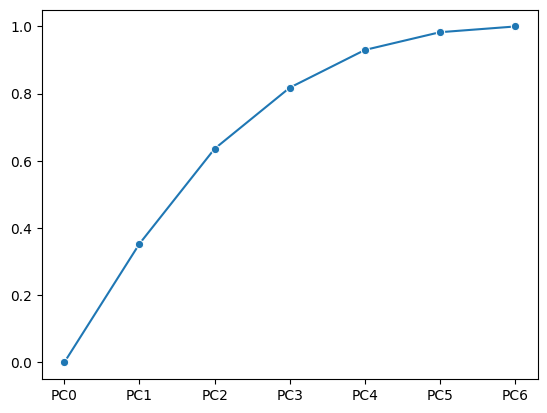

In [88]:
x = ["PC0"] + components.columns.tolist()
y = [0] + cum_var.tolist()
sns.lineplot(y=y, x=x, marker="o")

### Correlation graph

In [89]:
def correlation_graph(
    X_scaled,
    pca,
    dim: list = [0, 1],
):
    """Affiche le graphe des correlations

    Positional arguments :
        X_scaled : DataFrame | np.array : le dataset scaled
        pca : PCA : l'objet PCA déjà fitté

    Optional arguments :
        dim : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    """

    # Extrait x et y
    x, y = dim

    # features
    features = X_scaled.columns

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):
        # Les flèches
        ax.arrow(
            0,
            0,
            pca.components_[x, i],
            pca.components_[y, i],
            head_width=0.07,
            head_length=0.07,
            width=0.02,
        )

        # Les labels
        plt.text(
            pca.components_[x, i] + 0.05,
            pca.components_[y, i] + 0.05,
            features[i],
        )

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color="grey", ls="--")
    plt.plot([0, 0], [-1, 1], color="grey", ls="--")

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel(
        "F{} ({}%)".format(
            x + 1, round(100 * pca.explained_variance_ratio_[x], 1)
        )
    )
    plt.ylabel(
        "F{} ({}%)".format(
            y + 1, round(100 * pca.explained_variance_ratio_[y], 1)
        )
    )

    # title     
    plt.title("Cercle des corrélations (F{} et F{})".format(x + 1, y + 1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis("equal")
    plt.show(block=False)

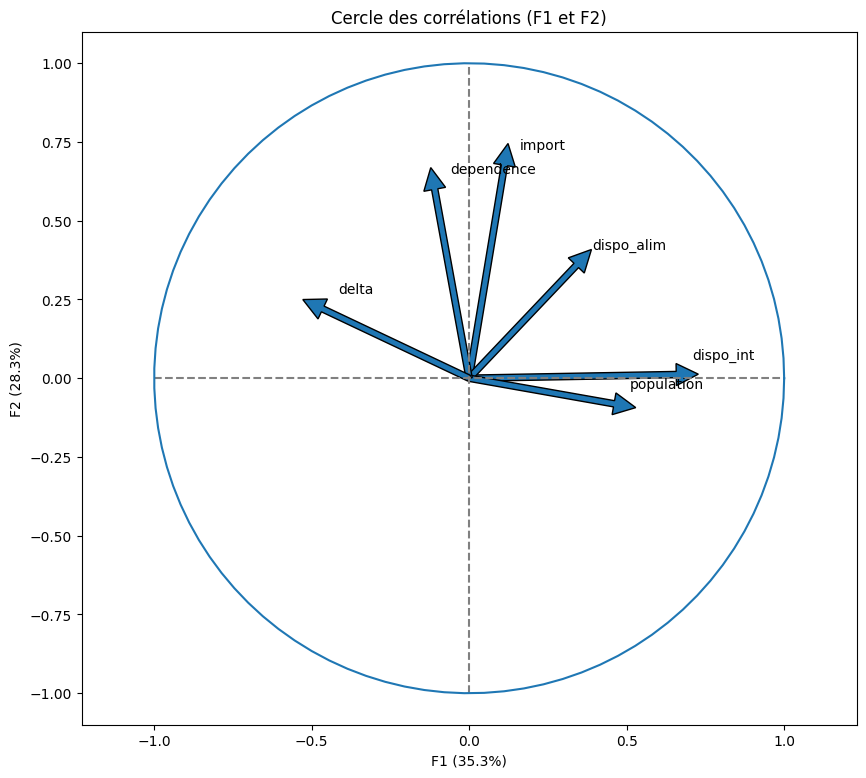

In [90]:
correlation_graph(
    X_scaled,
    pca,
    dim = [0, 1],
)

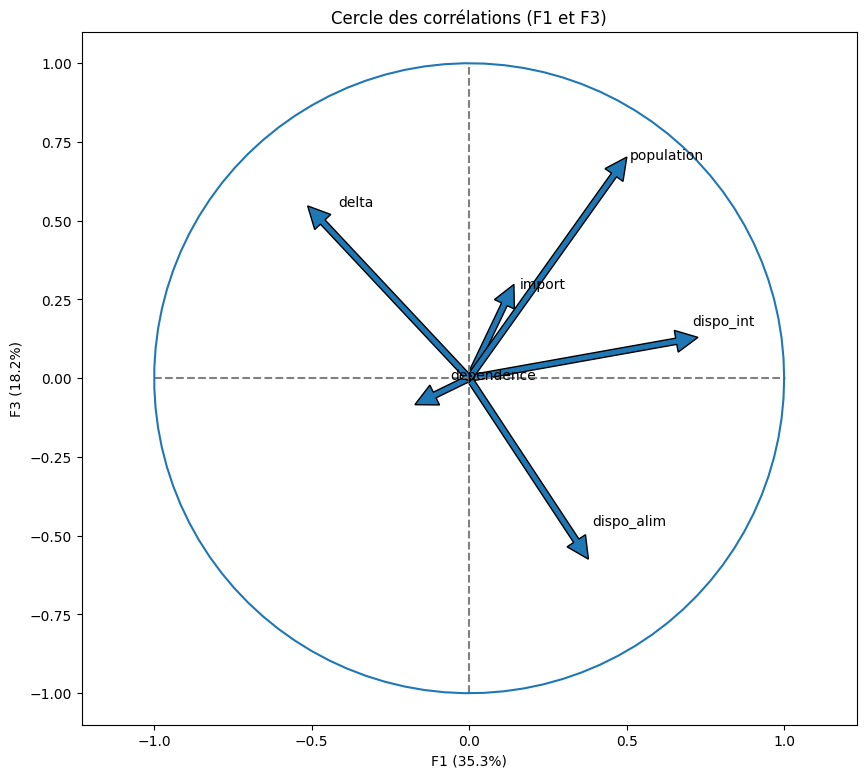

In [91]:
correlation_graph(
    X_scaled,
    pca,
    dim=[0, 2],
)

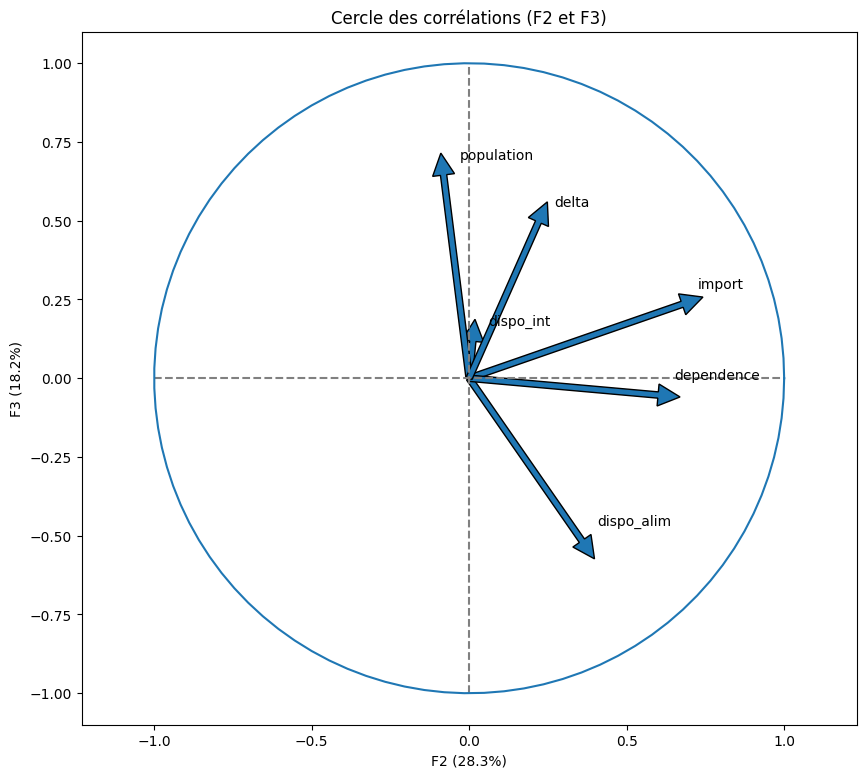

In [92]:
correlation_graph(
    X_scaled,
    pca,
    dim=[1, 2],
)

### Factorial planes

In [93]:
def factorial_planes(
    X_,
    pca,
    dim,
    labels: list = None,
    clusters: list = None,
    figsize: list = [12, 10],
    fontsize = 14,
):

    """Affiche les plans factoriels
    """

    x, y = dim

    dtypes = (pd.DataFrame, np.ndarray, pd.Series, list, tuple, set)
    if not isinstance(labels, dtypes):
        labels = []
    if not isinstance(clusters, dtypes):
        clusters = []

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    if len(clusters):
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=clusters)
    else:
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y])

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    v1 = str(round(100 * pca.explained_variance_ratio_[x])) + " %"
    v2 = str(round(100 * pca.explained_variance_ratio_[y])) + " %"

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f"F{x+1} {v1}")
    ax.set_ylabel(f"F{y+1} {v2}")

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color="grey", alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color="grey", alpha=0.8)

    # Affichage des labels des points
    if len(labels):
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(
                _x, _y + 0.05, labels[i], fontsize=fontsize, ha="center", va="center"
            )

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

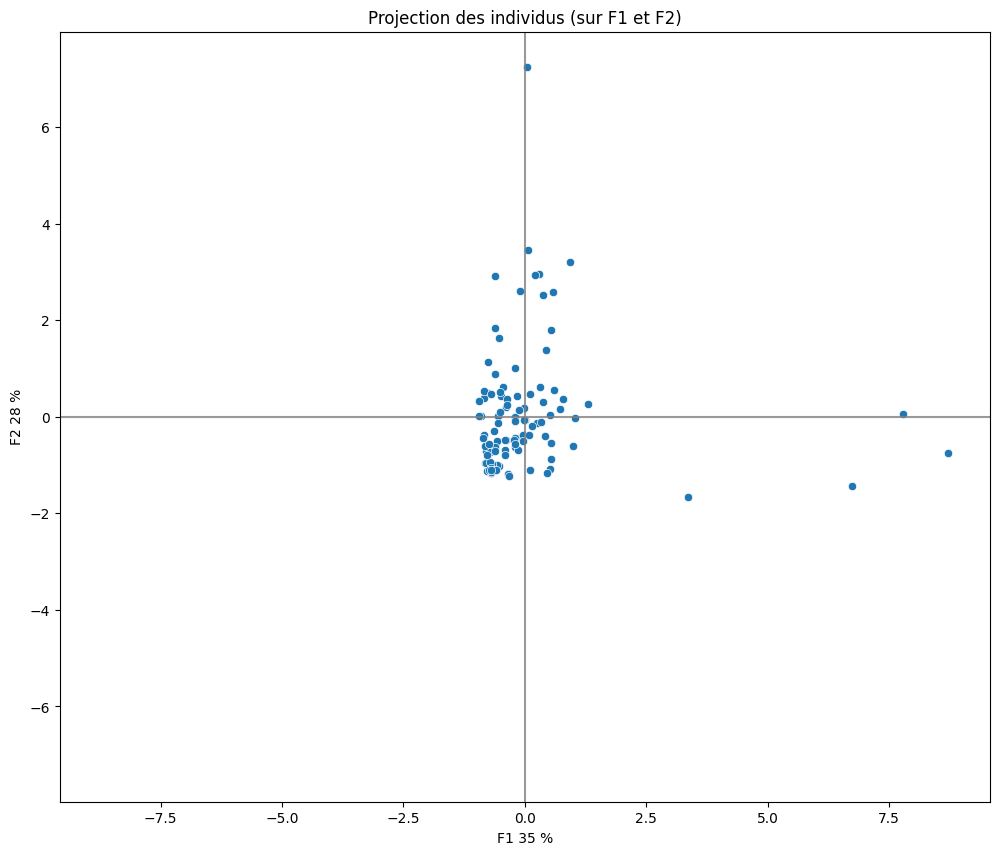

In [94]:
factorial_planes(X_proj.values, pca, [0, 1])

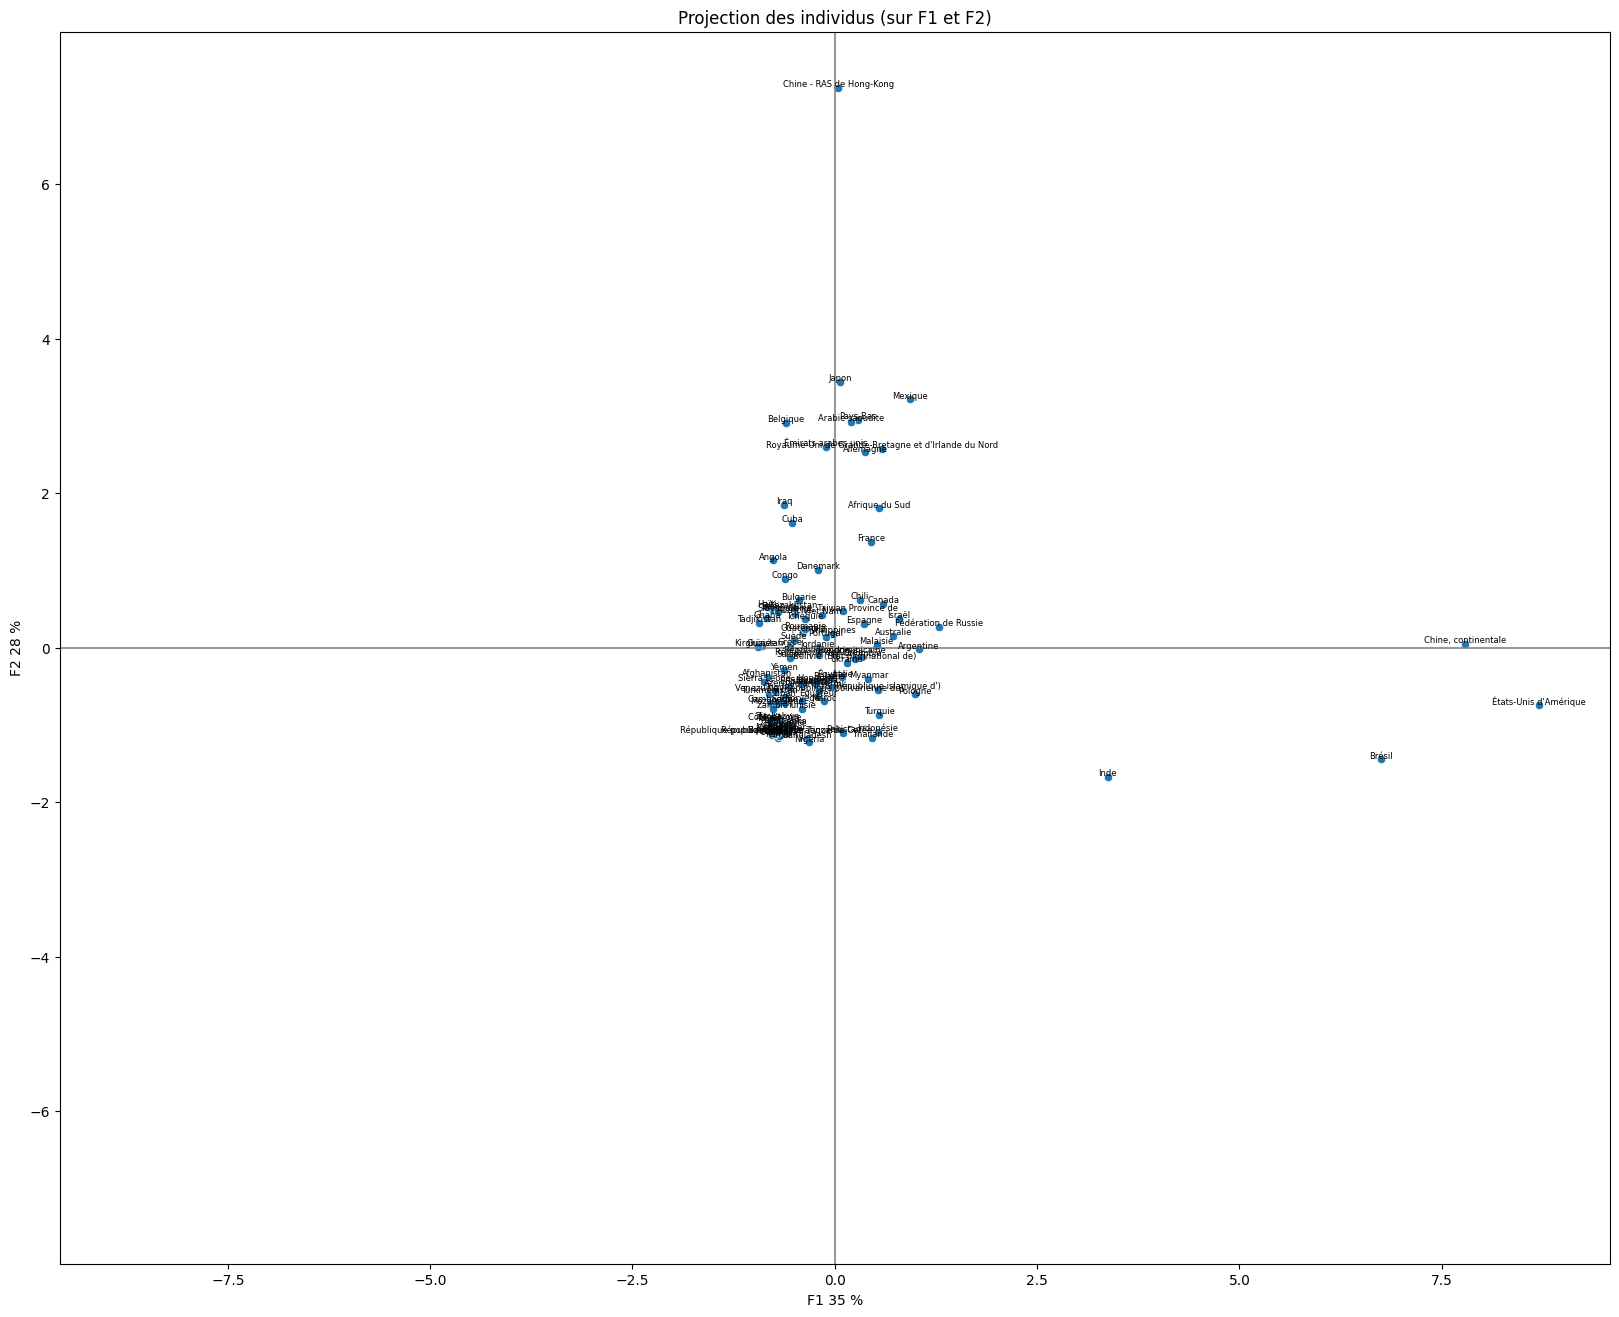

In [95]:
factorial_planes(X_proj.values, pca, [0, 1], labels=df.zone.values, figsize=(20, 16), fontsize=6)